In [2]:
!pip install ultralytics
from ultralytics import YOLO
import os
import pandas as pd 
import numpy as np
import shutil
import cv2 
import random 
import matplotlib.pyplot as plt
import copy
import wandb

In [3]:
train_folder=r"/kaggle/input/car-plates-roboflow-for-yolo-v8/test"
test_folder=r"/kaggle/input/car-plates-roboflow-for-yolo-v8/train"
val_folder=r"/kaggle/input/car-plates-roboflow-for-yolo-v8/valid"

In [4]:
def_size=640
bs = ' '
class_id=0
newline='\n'

In [5]:
ln_1='# Train/val/test sets'+newline
ln_2='train: ' +"'"+train_folder+"'"+newline
ln_3='val: ' +"'" + val_folder+"'"+newline
ln_4='test: ' +"'" + test_folder+"'"+newline
ln_5=newline
ln_6='# Classes'+newline
ln_7='names:'+newline
ln_8='  0: License_Plate'
config_lines=[ln_1, ln_2, ln_3, ln_4, ln_5, ln_6, ln_7, ln_8]

In [6]:
curr_path=r"/kaggle/working/"
config_path=os.path.join(curr_path, 'caryamo.yaml')
config_path

'/kaggle/working/caryamo.yaml'

In [7]:
# Writing config file
with open(config_path, 'w') as f:
    f.writelines(config_lines)


In [8]:
model=YOLO('yolov8n.yaml').load('yolov8n.pt')
print('done')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

done


In [9]:
# Training the model



model.train(data=os.path.join('/kaggle/working/','caryamo.yaml'),
            task='detect',
            
            epochs=30,
            batch=128,
            mode='train',
            name='radar')

Ultralytics YOLOv8.0.211 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/working/caryamo.yaml, epochs=30, patience=50, batch=128, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=radar3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /kaggle/input/car-plates-roboflow-for-yolo-v8/test/labels... 1019 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1019/1019 [00:03<00:00, 289.93it/s]
train: WARNING ⚠️ Cache directory /kaggle/input/car-plates-roboflow-for-yolo-v8/test is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/input/car-plates-roboflow-for-yolo-v8/valid/labels... 2046 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2046/2046 [00:08<00:00, 244.63it/s]
val: WARNING ⚠️ Cache directory /kaggle/input/car-plates-roboflow-for-yolo-v8/valid is not writeable, cache not saved.
Plotting labels to runs/detect/radar3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' an

lr/pg0,▁▂▃▄▅▅▆▆▇▇█████▇▇▆▆▅▅▅▄▄▃▃▂▂▂▁
lr/pg1,▁▂▃▄▅▅▆▆▇▇█████▇▇▆▆▅▅▅▄▄▃▃▂▂▂▁
lr/pg2,▁▂▃▄▅▅▆▆▇▇█████▇▇▆▆▅▅▅▄▄▃▃▂▂▂▁
metrics/mAP50(B),▁▆▇▇▆▆▆▄▆▅▅▅▇▇▇▇▇█████████████
metrics/mAP50-95(B),▁▆▆▆▅▅▅▃▅▄▅▅▇▆▆▇▇▇▇▇█▇████████
metrics/precision(B),▁▁██▇▇▇▄▆▅▅▅▇▇▇▇▇▇▇▇▇▇████████
metrics/recall(B),▄█▁▂▄▄▄▂▅▄▅▅▆▆▆▇▆▇▇▇▇▇████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▅▄▄▄▄▄▄▄▄▃▄▄▄▄▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ef6c81487c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
model = YOLO('/kaggle/working/runs/detect/radar/weights/best.pt')

In [11]:
results = model.predict(source=os.path.join('/kaggle/input/car-plates-roboflow-for-yolo-v8', '/kaggle/input/car-plates-roboflow-for-yolo-v8/test', 'images'), save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1019 /kaggle/input/car-plates-roboflow-for-yolo-v8/test/images/0002a5b67e5f0909_jpg.rf.07ca41e79eb878b14032f650f34d0967.jpg: 640x640 2 License_Plates, 7.1ms
image 2/1019 /kaggle/input/car-plates-roboflow-for-yolo-v8/test/images/000812dcf304a8e7_jpg.rf.559f904bc045f68ee947796a1b561d8f.jpg: 640x640 1 License_Plate, 6.9ms
image 3/1019 /kaggle/input/car-plates-roboflow-for-yolo-v8/test/images/0010f4c10f7ab07e_jpg.rf.92344aa620e23aacc490273e32343595

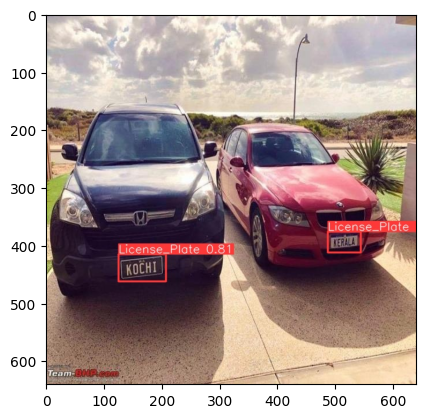

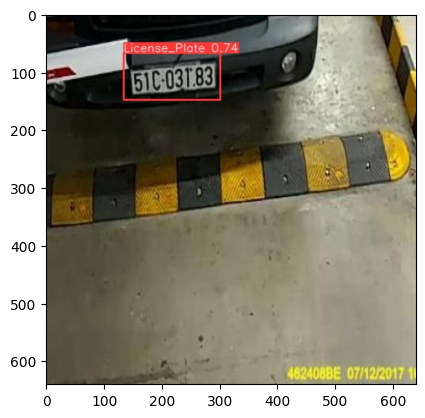

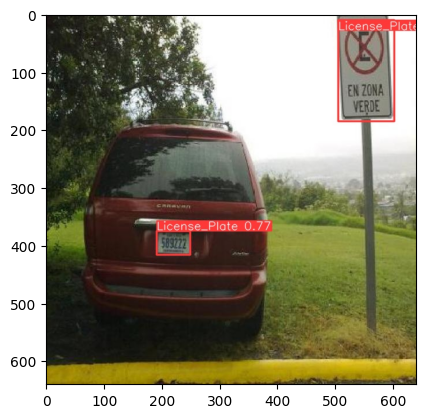

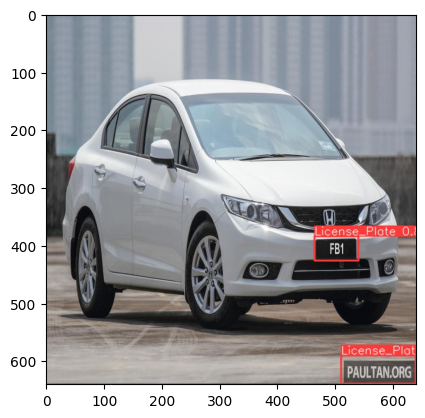

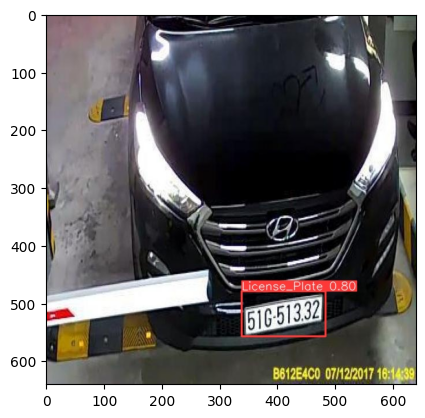

In [12]:
import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

predictions = glob.glob(os.path.join('/kaggle/working/', 'runs/detect/predict', '*'))

n = 5

for i in range(n):
    image = cv2.imread(predictions[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

In [13]:
import pytesseract
from pytesseract import Output

In [16]:
path1=r"/kaggle/input/car-plates-roboflow-for-yolo-v8/train/images/00009e5b390986a0_jpg.rf.04d1cbabbde68b6be73ada81c47f3528.jpg"
image=cv2.imread(path1)
result=model.predict(image)
result[0].boxes


0: 640x640 1 License_Plate, 8.2ms
Speed: 4.8ms preprocess, 8.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.3892], device='cuda:0')
data: tensor([[2.5789e+02, 5.8785e+02, 2.9107e+02, 6.2029e+02, 3.8917e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[274.4820, 604.0685,  33.1750,  32.4448]], device='cuda:0')
xywhn: tensor([[0.4289, 0.9439, 0.0518, 0.0507]], device='cuda:0')
xyxy: tensor([[257.8945, 587.8461, 291.0695, 620.2909]], device='cuda:0')
xyxyn: tensor([[0.4030, 0.9185, 0.4548, 0.9692]], device='cuda:0')

In [ ]:
img = cv2.imread("../input/559lkjhg/20211121_twitter.png")

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = d["left"][i], d["top"][i], d["width"][i], d["height"][i] 
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #Plotting bounding box
        img = cv2.putText(img, d['text'][i], (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, 1) #Plotting texts on top of box
        
plt.imshow(img)

In [ ]:
import re

email_pattern = '\S+@\S+'

img = cv2.imread("../input/559lkjhg/20211121_twitter.png")

d = pytesseract.image_to_data(img, output_type=Output.DICT)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        if re.match(email_pattern, d['text'][i]):
            (x, y, w, h) = d["left"][i], d["top"][i], d["width"][i], d["height"][i] 
            img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #Plotting bounding box
            print(f"Email: {d['text'][i]}")
        
plt.imshow(img)